In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
path = 'C:/Users/User/Desktop/MIT/Logistic Regression/data/'
filename = 'quality.csv'

In [3]:
qlt = pd.read_csv(path + filename)
qlt.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [4]:
qlt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MemberID              131 non-null    int64  
 1   InpatientDays         131 non-null    int64  
 2   ERVisits              131 non-null    int64  
 3   OfficeVisits          131 non-null    int64  
 4   Narcotics             131 non-null    int64  
 5   DaysSinceLastERVisit  131 non-null    float64
 6   Pain                  131 non-null    int64  
 7   TotalVisits           131 non-null    int64  
 8   ProviderCount         131 non-null    int64  
 9   MedicalClaims         131 non-null    int64  
 10  ClaimLines            131 non-null    int64  
 11  StartedOnCombination  131 non-null    bool   
 12  AcuteDrugGapSmall     131 non-null    int64  
 13  PoorCare              131 non-null    int64  
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.6 KB


In [5]:
qlt.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.567112,15.557252,17.442748,23.984733,43.244275,142.862595,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.767240,20.418001,12.298318,13.670285,28.886540,91.629921,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,206.958333,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,640.958333,8.000000,15.000000,20.000000,37.000000,120.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,71.000000,1.000000


In [6]:
#findnig a baseline
baseline = qlt['PoorCare'].mean()
baseline  #25% with poor quality

0.25190839694656486

In [7]:
#splitting data 
from sklearn.model_selection import train_test_split

In [8]:
y = qlt['PoorCare']
x = qlt[['OfficeVisits', 'Narcotics']]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=42)

In [10]:
x = sm.add_constant(x_train)
qltLog = sm.Logit(y_train, x).fit()
print(qltLog.summary())

Optimization terminated successfully.
         Current function value: 0.434247
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               PoorCare   No. Observations:                   98
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2353
Time:                        10:21:29   Log-Likelihood:                -42.556
converged:                       True   LL-Null:                       -55.651
Covariance Type:            nonrobust   LLR p-value:                 2.055e-06
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.7690      0.562     -4.931      0.000      -3.870      -1.668
OfficeVisits     0.0784

In [11]:
qltLog.aic

91.11249975017489

as we suspected office visits and narcotics has a significant impact on poor quality...which means servise to narcotics and after high volume of visits decrease.

In [12]:
#making predictions
x_test = sm.add_constant(x_test)
predictions = qltLog.predict(x_test)

In [13]:
threshold = 0.5
predicted_classes = (predictions >= threshold).astype(int)
#predicted_classes

In [14]:
#evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
accuracy = accuracy_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)

In [16]:
accuracy

0.8181818181818182

In [17]:
conf_matrix

array([[24,  1],
       [ 5,  3]], dtype=int64)

In [36]:
TP = conf_matrix[0, 0]  # True Positives
FN = conf_matrix[1, 1]  # False Negatives
sensitivity = TP / (TP + FN)
sensitivity

0.8888888888888888

In [37]:
TN = conf_matrix[1, 0]  # True Positives
FP = conf_matrix[0, 1]  # False Negatives
specificity = TN / (TN + FP)
specificity

0.8333333333333334

In [27]:
from sklearn.metrics import roc_curve, auc

adjusting treshhold

In [39]:
#calculating ROC curve
FP, TP, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(FP, TP)

In [29]:
import matplotlib.pyplot as plt

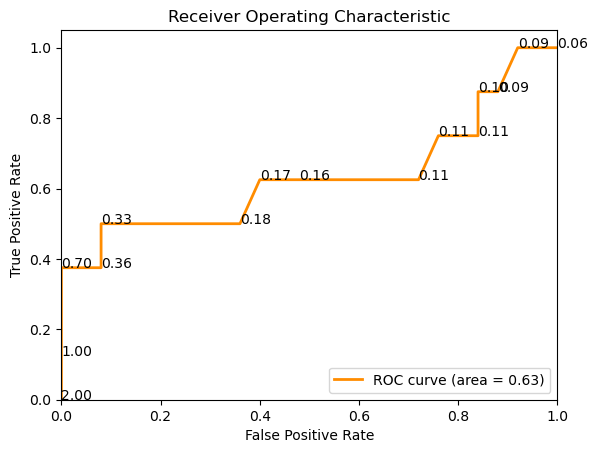

In [54]:
#ploting ROC curve
plt.figure()
plt.plot(FP, TP, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
for i, threshold in enumerate(thresholds):
    plt.annotate(f'{threshold:.2f}', xy=(FP[i], TP[i]))

plt.show()

In [62]:
roc_auc #how accurate the model is

0.6325

we can adjust now the treshhold accordind how we want our prediction to be. exm: if we want to predict more poor quality we can use a 0.1 treshhold meanwhile it will decrease the number of true negative predictions.